<a href="https://colab.research.google.com/github/whitestones011/deep_learning/blob/colab/single_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd

In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [1]:
from tensorflow import
from tensorflow.keras import layers

# Kaggle dataset

In [12]:
!pip install kaggle

In [10]:
!cp kaggle.json /root/.config/kaggle/kaggle.json

In [13]:
!chmod 600 /root/.config/kaggle/kaggle.json

In [14]:
import kaggle

In [15]:
kaggle.api.authenticate()

In [23]:
# !kaggle datasets list -s cereals

In [24]:
kaggle.api.dataset_download_files('crawford/80-cereals', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/crawford/80-cereals


In [29]:
df = pd.read_csv('cereal.csv')

In [30]:
df.shape

(77, 16)

In [34]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
target = 'calories'
features = ['protein', 'fat', 'sodium', 'fiber', 'carbo']

## Single neuron model: Keras

In [158]:
dat = np.linspace(-1.0, 1.0, 100)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


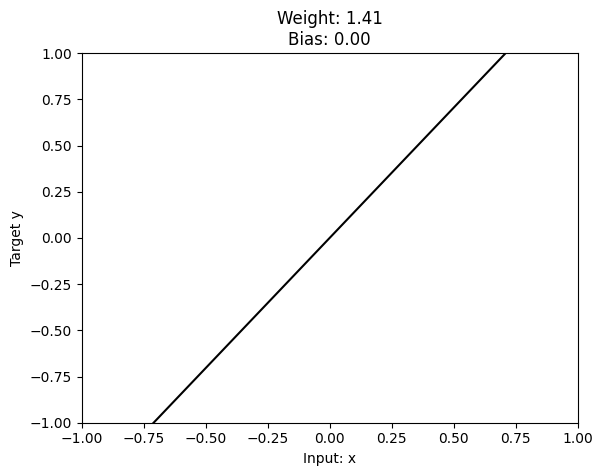

In [160]:
# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.convert_to_tensor(dat, np.float32)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

In [161]:
w, b = model.weights

In [162]:
print("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))

Weight: 1.41
Bias: 0.00


## Single neuron model: PyTorch

In [39]:
import torch

In [49]:
import numpy as np

In [149]:
class SingleNeuron(torch.nn.Module):

  def __init__(self, input_size, output_size):
    super(SingleNeuron, self).__init__()
    self.linear = torch.nn.Linear(input_size, output_size, dtype=float)

  def forward(self, x):
    out = self.linear(x)
    return out

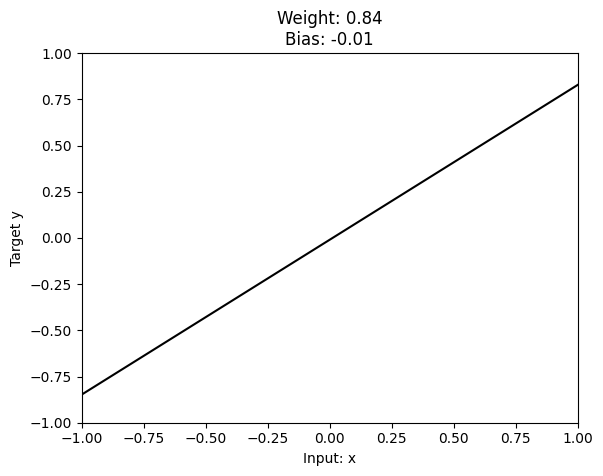

In [164]:
pytorch_model = SingleNeuron(1,1)

x = torch.tensor(dat.reshape(-1, 1))
y = pytorch_model(x).detach().numpy()

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = pytorch_model.linear.weight, pytorch_model.linear.bias
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()